In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import os
import json
from itertools import permutations
from sklearn.decomposition import PCA

np.random.seed(42)

%matplotlib inline

In [2]:
# Set data input folder
input_folder = "inputs"

# Set output folder, subfolder
output_folder = "outputs"
if not os.path.exists(output_folder):
    os.makedirs(output_folder, exist_ok=True)

In [3]:
# Load CORUM data
CORUM_data = pd.read_csv('../common_files/CORUM_humanComplexes.txt',sep = '\t')

# Load STRING data
STRING_data = pd.read_csv('../common_files/STRING_data.csv.gz')

# load gene level profiles 
df_gene = pd.read_csv(os.path.join(output_folder,'20240202_6W_CP498_SABER_Pilot_HeLa_SABER_only_guide_normalized_merged_feature_select_median_ALLWELLS_1_2_gene_aggregated.csv.gz')).set_index('Metadata_Foci_Barcode_MatchedTo_GeneCode')
# load hit lists 
whole_cell_hits = pd.read_csv(os.path.join(output_folder,'HeLa_SABER_plate_level_median_per_feat_sig_genes_1_FDR_whole_cell_hits.csv')).set_index('Gene')
comp_spec_hits = pd.read_csv(os.path.join(output_folder,'HeLa_SABER_plate_level_median_per_feat_sig_genes_1_FDR_compartment_specific_hits.csv')).set_index('Gene')
hit_list = list(comp_spec_hits.index) + list(whole_cell_hits.index)
df_hits = df_gene.loc[df_gene.index.isin(hit_list)]
df_hits

,Cells_AreaShape_BoundingBoxMaximum_X,Cells_AreaShape_BoundingBoxMaximum_Y,Cells_AreaShape_CentralMoment_0_1,Cells_AreaShape_CentralMoment_0_3,Cells_AreaShape_CentralMoment_1_0,Cells_AreaShape_CentralMoment_1_1,Cells_AreaShape_CentralMoment_1_2,Cells_AreaShape_CentralMoment_1_3,Cells_AreaShape_CentralMoment_2_1,Cells_AreaShape_CentralMoment_2_3,...,Nuclei_Texture_SumEntropy_Syto9_10_03_256,Nuclei_Texture_SumEntropy_btubulin_10_01_256,Nuclei_Texture_SumVariance_Calnexin_10_01_256,Nuclei_Texture_SumVariance_NfKb_10_01_256,Nuclei_Texture_SumVariance_Syto9_10_00_256,Nuclei_Texture_SumVariance_Syto9_10_02_256,Nuclei_Texture_SumVariance_TDP43_10_01_256,Nuclei_Texture_SumVariance_TDP43_10_02_256,Nuclei_Texture_SumVariance_TDP43_10_03_256,Nuclei_Texture_Variance_Syto9_10_01_256
Metadata_Foci_Barcode_MatchedTo_GeneCode,,,,,,,,,,,,,,,,,,,,,
ABCF1,0.089680,0.003170,-0.481500,0.561900,-0.173627,-0.255603,-0.225560,0.038622,-0.593172,-0.541509,...,0.196577,0.911600,-0.249272,-0.900122,0.418750,0.236627,0.870753,1.086598,0.983365,0.154630
ACTR2,0.428163,0.169513,0.220674,-0.029677,-0.171895,-0.167338,0.040010,0.099809,0.027234,0.055947,...,0.775320,1.795975,2.384025,3.684625,1.246983,1.286035,-0.034865,1.250970,0.133793,1.596575
ACTR3,-0.117397,0.100714,0.276567,-0.075942,-0.007420,0.096339,0.079977,0.085758,0.005884,-0.019326,...,0.721035,0.744330,1.801225,3.085825,1.397115,1.294045,-0.141707,1.063503,0.017260,1.367355
ADAR,-0.072347,-0.287860,-0.071108,0.162488,-0.203568,-0.025405,-0.058758,0.107698,0.151900,-0.143418,...,-0.337075,-0.677060,-0.484285,-0.327190,-0.321701,-0.272775,0.670327,0.391080,0.883005,-0.387705
ALG13,0.631587,-0.372993,-0.057874,-0.111827,0.164641,0.346150,-0.158062,0.327333,0.003463,0.044221,...,-0.205041,2.610950,3.101175,1.561300,0.873127,0.829190,-1.796275,-0.489150,-1.960825,0.821750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XPO5,-0.411073,-0.074393,-0.442967,-0.055197,-0.433333,0.133282,-0.096251,0.076805,0.178583,0.157433,...,0.526017,0.646972,-0.565098,-0.662510,0.558368,0.431444,1.397735,1.411575,1.143882,0.396250
ZC3H8,0.035870,-0.022036,-0.113226,-0.795568,0.568145,0.334002,0.077486,0.393525,-0.132623,-0.094868,...,0.412530,-0.134758,-0.226020,-0.626308,-0.189309,0.330240,0.609622,0.347368,0.625757,0.307787
ZC3HC1,0.010333,-0.615254,0.141876,0.142357,0.162268,-0.515610,-0.132690,-0.507639,0.166184,-0.064098,...,0.031808,-0.082787,0.206732,0.600818,-0.468210,-0.218002,0.324425,0.425944,0.546220,-0.371775


In [22]:
# Perform principal component analysis on hit list
pca = PCA()
pca.fit(df_hits)
x = list(pca.explained_variance_ratio_)
# Find principal component that represents 90% variation
PCA_lookup = {}
for i in range(len(x)):
    distance = abs(.9-sum(x[:i+1]))
    PCA_lookup[distance] = i 
component = PCA_lookup[min(PCA_lookup.keys())]+1
print (f'Principal component representing closest to 90% variation is {component}')
# Perform principal component analysis and select components representing 90% of variation in data
pca = PCA(n_components=component)
df_hits_pca = pd.DataFrame(pca.fit_transform(df_hits),index=df_hits.index)
df_hits_pca.head()

Principal component representing closest to 90% variation is 28


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
Metadata_Foci_Barcode_MatchedTo_GeneCode,,,,,,,,,,,,,,,,,,,,,
ABCF1,4.011155,-18.720662,12.665991,1.872391,6.355238,-0.753783,-0.884164,10.104454,-6.406709,-2.364073,...,-1.390902,-5.823346,-1.035967,-4.523859,3.513387,1.775972,-1.894806,-6.186268,1.172599,-0.602937
ACTR2,101.545023,37.526529,0.280460,-15.565781,-1.359485,13.184943,-4.131171,-1.731635,2.584288,-0.165972,...,-4.596344,-5.631908,4.868694,-2.108069,6.830518,-6.476248,0.142572,4.275432,-4.953079,-3.459956
ACTR3,73.995421,27.429672,-23.401744,-14.672318,4.581428,4.812287,2.458692,-2.108049,6.524277,-0.495680,...,-4.913755,-1.657348,0.098423,-6.871413,7.551776,-0.307039,-1.830054,3.393023,-2.019942,-1.487213
ADAR,-6.584400,-2.423863,-10.843075,-2.812427,-2.785415,2.570573,-2.691221,0.507463,-0.059283,-2.669531,...,3.600899,-1.568415,-0.137212,-1.063866,0.427881,-0.335674,-1.025677,1.461958,2.716791,1.868892
ALG13,69.468441,-3.712372,6.182472,29.951868,40.339299,12.885050,-6.747935,-2.236828,-24.712439,26.191240,...,16.065635,-11.889956,14.971262,-13.661381,3.191443,5.343969,-7.817658,-4.213351,-3.342169,-9.128973


In [23]:
# Calculate correlation between all gene pairs and create a dictionary of gene pairs/correlation
df_hits_corr = df_hits_pca.T.corr()
genes = list(df_hits_corr.index)
corr_dic = {}
for gene1 in genes:
    for gene2 in genes:
        if len(frozenset([gene1,gene2])) == 1 :
            continue
        else:    
            corr_dic[frozenset([gene1,gene2])]=(df_hits_corr.loc[gene1,gene2])
        
print(f'Gene pair correlation dictionary contains {len(corr_dic)} entries')

Gene pair correlation dictionary contains 73536 entries


In [24]:
# Create a list of protein clusters with all complexes that had at least 66% of genes represented within the A549 WGS hits
cluster_count = 0
hit_cluster_list_list = []
hit_set = set()
for i in range(len(CORUM_data)):
    cluster = CORUM_data.iloc[i]['subunits(Gene name)'].split(';')
    count = 0
    hit_cluster_list = []
    for g in cluster:
        if g in genes:
            count += 1
            hit_set.add(g)
            hit_cluster_list.append(g)
    if (count/len(cluster)) > 0.333:
        cluster_count += 1
    if hit_cluster_list and (count/len(cluster)) > 0.333:
        hit_cluster_list_list.append(hit_cluster_list)
print(f'There are {len(hit_set)} unique genes within the cluster')
print(f'There are {cluster_count} clusters within the hit genes with at least 1/3 overlap with a CORUM cluster')
print(f'There are {len(hit_cluster_list_list)} duplicates within the list')

There are 252 unique genes within the cluster
There are 335 clusters within the hit genes with at least 1/3 overlap with a CORUM cluster
There are 335 duplicates within the list


In [25]:
# Assign correlations to hit gene pairs
hit_pair_set = set()
for l in hit_cluster_list_list:
    for c in list(permutations(l,2)):
        hit_pair_set.add(frozenset(c))

hit_corr_dic = {}
for s in hit_pair_set:
    if len(s) != 1:
        hit_corr_dic[s] = corr_dic[s]

print(f'There are {len(hit_pair_set)} hit pairs.')
print(f'There are {len(hit_corr_dic)} hit pairs with correlation.')

There are 81 hit pairs.
There are 81 hit pairs with correlation.


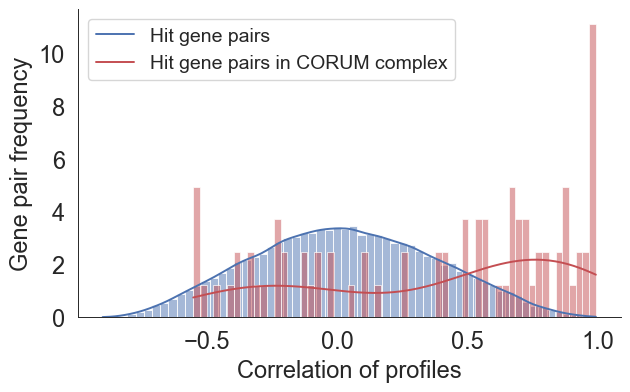

In [26]:
# Plot CORUM gene pair correlation distribution
sns.set_theme(style="white",rc = {'axes.linewidth': 0.7,'xtick.labelsize':17,'ytick.labelsize':17})

fig, ax = plt.subplots(figsize=(7,4))
a = list(corr_dic.values())
b = list(hit_corr_dic.values())

sns.histplot(a ,color='b' ,stat= 'percent' ,bins= 60, kde=True, line_kws={'lw':1.4} , alpha=0.5,ax = ax);
sns.histplot(b ,color='r' ,stat= 'percent' ,bins= 60, kde=True, line_kws={'lw':1.4} ,alpha=0.5,ax = ax);

ax.set_ylabel('Gene pair frequency',size=17)
ax.set_xlabel('Correlation of profiles',size=17)
font = font_manager.FontProperties(size=14)
ax.legend(['Hit gene pairs','Hit gene pairs in CORUM complex'],loc='upper left',prop=font )
sns.despine(top = True)

fig.savefig(os.path.join(output_folder,'figure_panels','HeLa_SABER_CORUM_gene_pair_correlation_distribution.png'), dpi=300,facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

In [27]:
# Calculate the median values for correlations for background gene pairs and gene pairs in CORUM clusters 
print("Background gene pair profile correlation median",np.median(list(corr_dic.values())))
print("Gene pairs in CORUM clusters profile correlation median",np.median(list(hit_corr_dic.values())))

Background gene pair profile correlation median 0.024953003526268207
Gene pairs in CORUM clusters profile correlation median 0.5412265966132391


In [28]:
# Subset the STRING predicted protein links to  hits
STRING_data_hits = STRING_data[STRING_data['protein1'].isin(genes) & STRING_data['protein2'].isin(genes)]
print(f'Full PPI database is {len(STRING_data)} entries')
print(f'PPI database subsetted to hits is {len(STRING_data_hits)} entries')
corr_min = min(corr_dic.values())
corr_max = max(corr_dic.values())   
print(f'Minimum correlation is {corr_min}')
print(f'Maximum correlation is {corr_max}')

Full PPI database is 11938498 entries
PPI database subsetted to hits is 21512 entries
Minimum correlation is -0.8996104075292005
Maximum correlation is 0.9919492975695644


In [29]:
# Bin the correlations into 8 categories 
results = STRING_data_hits.copy(deep=True).reset_index(drop=True)

bins = [-1,-0.66,-0.33,0,0.33,0.66,1]
for i in range(len(results)):
    gene1 = results.iloc[i]['protein1']
    gene2 = results.iloc[i]['protein2']
    corr_value = corr_dic[frozenset([gene1,gene2])]
    results.at[i , 'correlation'] = corr_value
    if corr_value > bins[5]:
        results.at[i , 'correlation_bin'] = f'{bins[5]} to {bins[6]}'
    elif corr_value > bins[4] and corr_value <= bins[5]:
        results.at[i , 'correlation_bin'] = f'{bins[4]} to {bins[5]}'
    elif corr_value > bins[3] and corr_value <= bins[4]:
        results.at[i , 'correlation_bin'] = f'{bins[3]} to {bins[4]}'
    elif corr_value > bins[2] and corr_value <= bins[3]:
        results.at[i , 'correlation_bin'] = f'{bins[2]} to {bins[3]}'
    elif corr_value > bins[1] and corr_value <= bins[2]:
        results.at[i , 'correlation_bin'] = f'{bins[1]} to {bins[2]}'
    elif corr_value <= bins[1]:
        results.at[i , 'correlation_bin'] = f'{bins[0]} to {bins[1]}'
results.head()

,protein1,protein2,combined_score,correlation,correlation_bin
0,NDUFAF7,EIF2S3,204,-0.178181,-0.33 to 0
1,NDUFAF7,SCO1,219,0.413534,0.33 to 0.66
2,NDUFAF7,ECSIT,814,0.783392,0.66 to 1
3,NDUFAF7,TOMM40,163,-0.476017,-0.66 to -0.33
4,NDUFAF7,IARS2,166,-0.215232,-0.33 to 0


/var/folders/pm/r5xv70_14yx_b9gflxr4xck40000gp/T/ipykernel_94278/1755501725.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(round(float(label))) for label in labels], size=16)


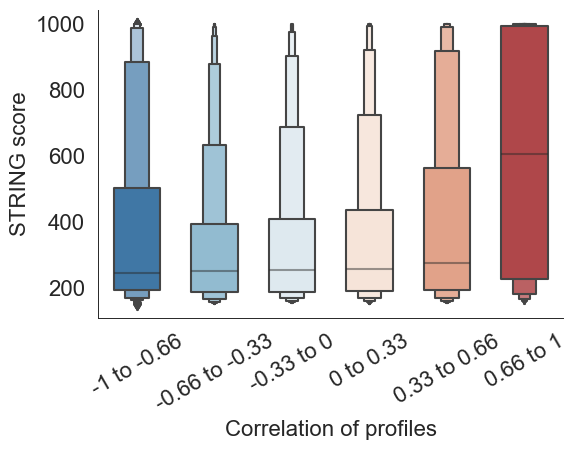

In [30]:
# Plot STRING score x gene pair correlation
sns.set_theme(style="white",rc = {'axes.linewidth': 0.7})

fig, ax = plt.subplots(figsize=(6,4))
order = [f'{bins[0]} to {bins[1]}',f'{bins[1]} to {bins[2]}',f'{bins[2]} to {bins[3]}',f'{bins[3]} to {bins[4]}',f'{bins[4]} to {bins[5]}',f'{bins[5]} to {bins[6]}']

flierprops = dict(markerfacecolor='white', markersize=0.1, linestyle='none')
sns.boxenplot(data=results,
            x = 'correlation_bin',
            y = 'combined_score',
            order=order, 
            width = 0.6,
            palette = 'RdBu_r',
            ax=ax)

ax.set_xlabel('Correlation of profiles',size=16)
ax.set_ylabel('STRING score',size=16)
ax.tick_params(axis='both', which='major', labelsize=14)
labels = [item for item in ax.get_yticks()]
ax.set_yticklabels([str(round(float(label))) for label in labels], size=16)
ax.set_xticklabels(order, size=16,rotation=30)
sns.despine(top = True,left=False,bottom=False)

fig.savefig(os.path.join(output_folder,'figure_panels','HeLa_SABER_STRING_gene_pair_correlation_score.png'), 
            dpi=300,
            facecolor='w', 
            edgecolor='w', 
            bbox_inches='tight')
plt.show()
